In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
xlsx_file = pd.read_excel('/content/Data_Train.xlsx')

In [5]:
csv_file = '/content/Data_Train.csv'

In [6]:
xlsx_file.to_csv(csv_file, index=None, header=True)

In [7]:
data=pd.read_csv('/content/Data_Train.csv')

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data.Destination.unique

<bound method Series.unique of 0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10683, dtype: object>

In [10]:
data.Date_of_Journey = data.Date_of_Journey.str.split('/')

In [11]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [12]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [13]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [14]:
#since the maximum number of is 4, there should be maximum 6 cities in any particular route.we split the data in route column
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [15]:
data['city1']=data.Route.str[0]
data['city2']=data.Route.str[1]
data['city3']=data.Route.str[2]
data['city4']=data.Route.str[3]
data['city5']=data.Route.str[4]
data['city6']=data.Route.str[5]

In [16]:
#In the similar manner,we split the Dep_time column,and create separate columns of departure hours and minutes-
data.Dep_Time=data.Dep_Time.str.split(':')

In [17]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [18]:
data.Arrival_Time=data.Arrival_Time.str.split('')

In [19]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [20]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [21]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [22]:
#Next, we divide the 'Duration' column to 'Travel_mins'

data.Duration=data.Duration.str.split(' ')

In [23]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [24]:
#We also treat the 'Total_stops' column, and replace non-stop flights with 0 value and extract the integer part of the'Total_stops'
data.Total_Stops.replace('non-stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [25]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [26]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [27]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops           3492
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
city1                    1
city2                10683
city3                10683
city4                10683
city5                10683
city6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [28]:
#we also drop some columns like 'city6' and 'city5',since majority of the data in these columns was NaN(null)
data.drop(['city4','city5','city6'],axis=1,inplace=True)

In [29]:
data.drop(['Arrival_Time_Mins',],axis=1, inplace=True)
data.drop(['Travel_Mins'],axis=1,inplace=True)

In [30]:
#check Null values
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops           3492
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
city1                    1
city2                10683
city3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Travel_Hours             0
dtype: int64

# Replacing Missing Value

In [31]:
#filling  total_stop as none, missing valuees are less
data['Total_Stops'].fillna('None',inplace=True)

In [32]:
#filling  city1 as none, missing valuees are less
data['city1'].fillna('None',inplace=True)

In [33]:
#filling  city2 as none, missing valuees are less
data['city2'].fillna('None',inplace=True)

In [34]:
#filling  city3 as none, missing valuees are less
data['city3'].fillna('None',inplace=True)

In [35]:
#filling  Travel_Mins as Zero
data['Route'].fillna(0,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10683 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10683 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  object
 12  Month              10683 non-null  object
 13  Year               10683 non-null  object
 14  city1              10683 non-null  object
 15  city2              10683 non-null  object
 16  city3              10683 non-null  objec

In [37]:
#changing the numerical colums from object to int
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
#data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
#data.Travel_Hours=data.Travel_Hours.astype('int64')
#data.Travel_Mins=data.Travel_Mins.astype('int64')

In [38]:
data[data['Travel_Hours']=='5']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,city1,city2,city3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Travel_Hours
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,[CCU → NAG → BLR],"[18, 05]","[, 2, 3, :, 3, 0, ]","[5h, 25m]",1,No info,...,2019,CCU → NAG → BLR,None,None,18,05,2,[],,5
20,GoAir,"[6, 03, 2019]",Delhi,Cochin,[DEL → BOM → COK],"[14, 10]","[, 1, 9, :, 2, 0, ]","[5h, 10m]",1,No info,...,2019,DEL → BOM → COK,None,None,14,10,1,[],,5
26,IndiGo,"[1, 06, 2019]",Delhi,Cochin,[DEL → LKO → COK],"[21, 50]","[, 0, 3, :, 3, 5, , 0, 2, , J, u, n, ]","[5h, 45m]",1,No info,...,2019,DEL → LKO → COK,None,None,21,50,0,[],,5
27,GoAir,"[15, 05, 2019]",Delhi,Cochin,[DEL → BOM → COK],"[07, 00]","[, 1, 2, :, 5, 5, ]","[5h, 55m]",1,No info,...,2019,DEL → BOM → COK,None,None,7,00,1,[],,5
34,Jet Airways,"[18, 05, 2019]",Delhi,Cochin,[DEL → BOM → COK],"[07, 05]","[, 1, 2, :, 3, 5, ]","[5h, 30m]",1,In-flight meal not included,...,2019,DEL → BOM → COK,None,None,7,05,1,[],,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,IndiGo,"[9, 06, 2019]",Delhi,Cochin,[DEL → MAA → COK],"[02, 00]","[, 0, 7, :, 2, 5, ]","[5h, 25m]",1,No info,...,2019,DEL → MAA → COK,None,None,2,00,0,[],,5
10619,IndiGo,"[27, 04, 2019]",Delhi,Cochin,[DEL → LKO → COK],"[21, 50]","[, 0, 3, :, 3, 5, , 2, 8, , A, p, r, ]","[5h, 45m]",1,No info,...,2019,DEL → LKO → COK,None,None,21,50,0,[],,5
10628,SpiceJet,"[9, 05, 2019]",Kolkata,Banglore,[CCU → IXB → BLR],"[15, 55]","[, 2, 1, :, 2, 5, ]","[5h, 30m]",1,No info,...,2019,CCU → IXB → BLR,None,None,15,55,2,[],,5
10631,IndiGo,"[15, 05, 2019]",Delhi,Cochin,[DEL → BLR → COK],"[02, 00]","[, 0, 7, :, 4, 5, ]","[5h, 45m]",1,No info,...,2019,DEL → BLR → COK,None,None,2,00,0,[],,5


In [39]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,city1,city2,city3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Travel_Hours
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,[BLR → DEL],"[22, 20]","[, 0, 1, :, 1, 0, , 2, 2, , M, a, r, ]","[2h, 50m]",None,No info,...,2019,BLR → DEL,None,None,22,20,0,[],,2
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,[CCU → IXR → BBI → BLR],"[05, 50]","[, 1, 3, :, 1, 5, ]","[7h, 25m]",2,No info,...,2019,CCU → IXR → BBI → BLR,None,None,5,50,1,[],,7
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,[DEL → LKO → BOM → COK],"[09, 25]","[, 0, 4, :, 2, 5, , 1, 0, , J, u, n, ]",[19h],2,No info,...,2019,DEL → LKO → BOM → COK,None,None,9,25,0,[],,19
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,[CCU → NAG → BLR],"[18, 05]","[, 2, 3, :, 3, 0, ]","[5h, 25m]",1,No info,...,2019,CCU → NAG → BLR,None,None,18,05,2,[],,5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,[BLR → NAG → DEL],"[16, 50]","[, 2, 1, :, 3, 5, ]","[4h, 45m]",1,No info,...,2019,BLR → NAG → DEL,None,None,16,50,2,[],,4


In [40]:
data.isnull().any()

Airline              False
Date_of_Journey      False
Source               False
Destination          False
Route                False
Dep_Time             False
Arrival_Time         False
Duration             False
Total_Stops          False
Additional_Info      False
Price                False
Date                 False
Month                False
Year                 False
city1                False
city2                False
city3                False
Dep_Time_Hour        False
Dep_Time_Mins        False
Arrival_date         False
Time_of_Arrival      False
Arrival_Time_Hour    False
Travel_Hours         False
dtype: bool

In [41]:
categorical=['Airline','source','Destination','Additional_info','City1']
numerical=['Total_Stop','Date','Month','Year','Dep_Time_Hour','Dep_time_Mins','Arrival_date','Arrival_Time_Hour',
           'Arrival_time_mins','Travel_Hours','Travel_Mins']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10683 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10683 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  int64 
 12  Month              10683 non-null  int64 
 13  Year               10683 non-null  int64 
 14  city1              10683 non-null  object
 15  city2              10683 non-null  object
 16  city3              10683 non-null  objec

In [43]:
#remove missing value
data.dropna(inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.city1=le.fit_transform(data.city1)
data.city2=le.fit_transform(data.city2)
data.city3=le.fit_transform(data.city3)
data.Additional_Info=le.fit_transform(data.Additional_Info)

In [46]:
#outlput columns
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,city1,city2,city3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Travel_Hours
0,3,"[24, 03, 2019]",0,New Delhi,[BLR → DEL],"[22, 20]","[, 0, 1, :, 1, 0, , 2, 2, , M, a, r, ]","[2h, 50m]",None,8,...,2019,18,0,0,22,20,0,[],,2
1,1,"[1, 05, 2019]",3,Banglore,[CCU → IXR → BBI → BLR],"[05, 50]","[, 1, 3, :, 1, 5, ]","[7h, 25m]",2,8,...,2019,84,0,0,5,50,1,[],,7
2,4,"[9, 06, 2019]",2,Cochin,[DEL → LKO → BOM → COK],"[09, 25]","[, 0, 4, :, 2, 5, , 1, 0, , J, u, n, ]",[19h],2,8,...,2019,118,0,0,9,25,0,[],,19
3,3,"[12, 05, 2019]",3,Banglore,[CCU → NAG → BLR],"[18, 05]","[, 2, 3, :, 3, 0, ]","[5h, 25m]",1,8,...,2019,91,0,0,18,05,2,[],,5
4,3,"[01, 03, 2019]",0,New Delhi,[BLR → NAG → DEL],"[16, 50]","[, 2, 1, :, 3, 5, ]","[4h, 45m]",1,8,...,2019,29,0,0,16,50,2,[],,4


In [47]:
data = data[['Airline','Destination','Date','Month','Year','Dep_Time_Hour','Arrival_date','Price']]

In [48]:
data.head()

,Airline,Destination,Date,Month,Year,Dep_Time_Hour,Arrival_date,Price
0,3,New Delhi,24,3,2019,22,0,3897
1,1,Banglore,1,5,2019,5,1,7662
2,4,Cochin,9,6,2019,9,0,13882
3,3,Banglore,12,5,2019,18,2,6218
4,3,New Delhi,1,3,2019,16,2,13302


EDA

In [49]:
data.describe()

,Airline,Date,Month,Year,Dep_Time_Hour,Arrival_date,Price
count,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000
mean,3.965927,13.508378,4.708602,2019.0,12.490686,0.896845,9087.064121
std,2.352155,8.479277,1.164357,0.0,5.748650,0.711812,4611.359167
min,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1759.000000
25%,3.000000,6.000000,3.000000,2019.0,8.000000,0.000000,5277.000000
50%,4.000000,12.000000,5.000000,2019.0,11.000000,1.000000,8372.000000
75%,4.000000,21.000000,6.000000,2019.0,18.000000,1.000000,12373.000000
max,11.000000,27.000000,6.000000,2019.0,23.000000,2.000000,79512.000000


In [50]:
c=1
plt.figure(figsize=(20,45))

<Figure size 2000x4500 with 0 Axes>

<Figure size 2000x4500 with 0 Axes>

<ipython-input-53-049e7ab17fe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

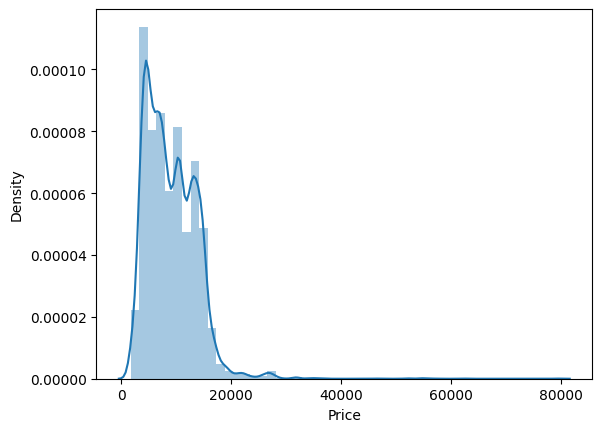

In [53]:
sns.distplot(data['Price'])

<Axes: >

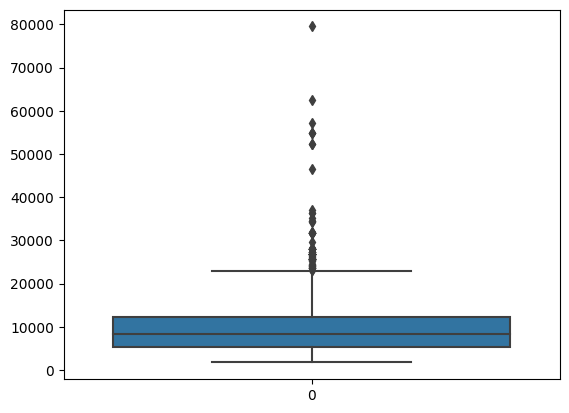

In [52]:
sns.boxplot(data['Price'])

In [54]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()

In [56]:
data['Destination'] = data['Destination'].apply(float)

ValueError: ignored

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(df['Duration'],hue=df['Price'])
plt.subplot(132)
sns.countplot(df['Route'],hue=df['Price']

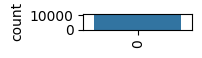

KeyError: ignored

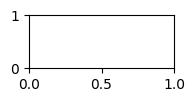

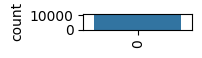

KeyError: ignored

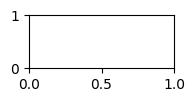

In [72]:
for i in categorical:
  plt.subplot(6,3,c)
  sns.countplot(data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
  plt.show( )

In [59]:
x_scaled = pd.DataFrame(x_scaled,columns=x.colums)

NameError: ignored

In [ ]:
data.head()

In [57]:
x_scaled = ss.fit_transform(x)

ValueError: ignored